In [1]:
import os
import glob
import numpy as np
# from ccdproc import ImageFileCollection
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table, hstack
from scipy.optimize import curve_fit

In [2]:
##	Plot presetting
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')
# default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## 7DT

In [3]:
import sys
sys.path.append('..')
from util.helper import *
from util.sdtpy import *
register_custom_filters_on_speclite('../util')

Use `med25nm`, `med50nm`, `broad` as `group_name`


In [4]:
#	Subsequent filter info [AA]
bandmin=4000
bandmax=9000
bandwidth=250
bandstep=125
#	Maximum transmission of each filters
bandrsp=0.95
#	Wavelength bin [AA]
lammin=1000
lammax=10000
lamres=1000
#	Seeing Condition
seeing = 1.5
#
exptime = 180

D             : 50.5cm
D_obscuration : 29.8cm
Deff          : 40.770cm


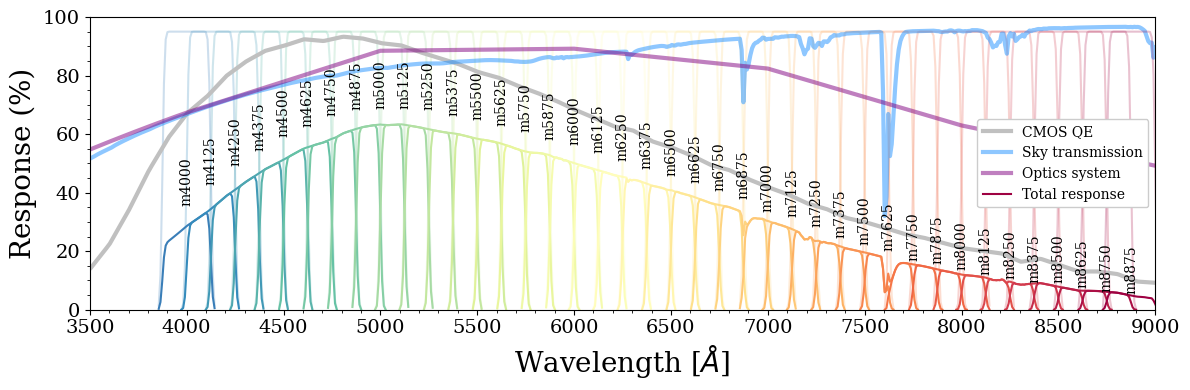

In [5]:
#	Exposure Time [s]
sdt = SevenDT()
sdt.echo_optics()
filterset = sdt.generate_filterset(bandmin=bandmin, bandmax=bandmax, bandwidth=bandwidth, bandstep=bandstep, bandrsp=bandrsp, lammin=lammin, lammax=lammax, lamres=lamres)
T_qe = sdt.get_CMOS_IMX455_QE()
sdt.get_optics()
s = sdt.get_sky()
sdt.smooth_sky()
totrsptbl = sdt.calculate_response()
Npix_ptsrc, Narcsec_ptsrc = sdt.get_phot_aperture(exptime=exptime, fwhm_seeing=seeing, optfactor=1.0, verbose=False)
outbl_ris = sdt.get_depth_table(Nsigma=5)
sdt.get_speclite()

## Initial Setting

In [6]:
path_save = '../output/GALAH'
if not os.path.exists(path_save): os.makedirs(path_save)

In [8]:
try:
	print(intbl[:3])
except:
	intbl = Table.read('../data/GALAH/GALAH_DR3_main_allstar_v2.fits')

    star_id         sobject_id   ...   bc_ks        ruwe_dr2     
                                 ...    mag                      
---------------- --------------- ... --------- ------------------
03325271-6840304 131116000501002 ... 2.1981099 1.0987638037798317
03345385-6836362 131116000501003 ...  2.669922  1.184694482545447
03422255-6841522 131116000501004 ... 1.9896321 0.9910400074815263


## Sample Spectrum

In [29]:
colors = ['blue', 'green', 'red', 'purple']

In [30]:
spectra = sorted(glob.glob('../data/GALAH/sample/*fits'))
print(f"{len(spectra)} spectra")

4 spectra


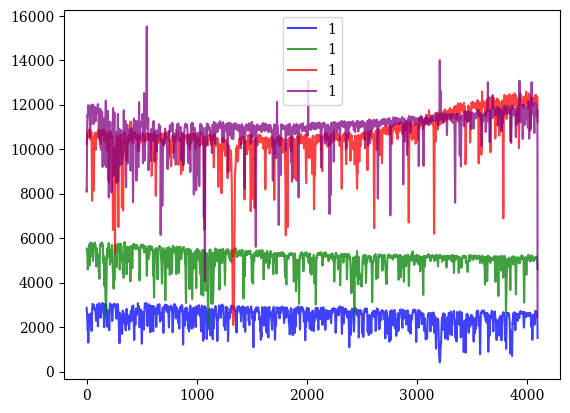

In [39]:
from astropy.io import fits
for ss, _specfile in enumerate(spectra):
	# _sptbl = Table.read(_specfile)
	# print(_sptbl)
	_data, _hdr = fits.getdata(_specfile, header=True)
	# det = _hdr['DETECYS']
	plt.plot(_data, c=colors[ss], alpha=0.75,)# label=f"{det}")

plt.legend()

In [38]:
_hdr

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 4096 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'GALAH DR3'          / FITS file originator                           
DATE    = '2018-02-17T18:48:18' / Date FITS file was generated                  
IRAF-TLM= '2018-02-17T18:48:18' / Time of last modification                     
OBJECT  = '170418003701205'    / Name of t                                      
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
LONGSTRN= 'OGIP 1.0'           / The HEASARC Long String Convention may be used.
COMMENT   This FITS file may

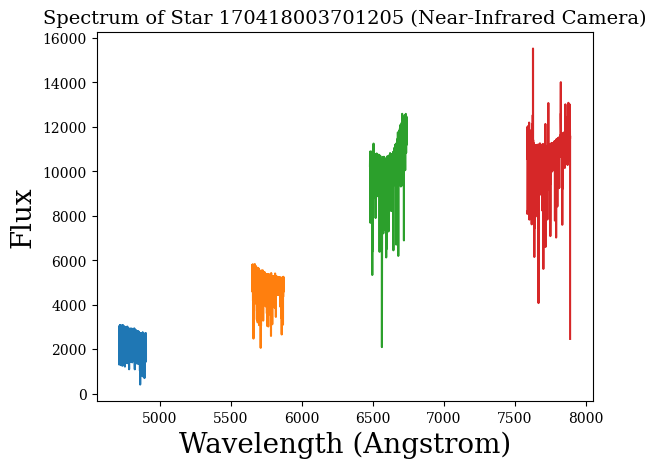

In [42]:
for _specfile in spectra:
    # FITS 파일 읽기
    fits_file = _specfile
    with fits.open(fits_file) as hdul:
        header = hdul[0].header
        flux = hdul[0].data

        # 파장 배열 계산
        crval1 = header['CRVAL1']
        cdelt1 = header['CDELT1']
        crpix1 = header['CRPIX1']
        npix = len(flux)
        wavelength = crval1 + (np.arange(npix) - crpix1 + 1) * cdelt1

    # 그래프 그리기
    plt.plot(wavelength, flux)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Flux')
    plt.title('Spectrum of Star 170418003701205 (Near-Infrared Camera)')
    # plt.show()
